# Air Quality Submetric — Best Neighborhood in Pittsburgh

**Author:** Brady Baker   
**Dataset:** [Daily AQI Data (WPRDC)](https://data.wprdc.org/dataset/allegheny-county-air-quality)  
**Metric:** Average Air Quality Index (AQI) by monitoring site  
**Goal:** Determine which Pittsburgh neighborhood has the best air quality (lowest average AQI).

Clean air is a key part of livability — neighborhoods with better air quality support better health and comfort. 
In this analysis, I’ll use the Allegheny County *Daily AQI Data* to find which neighborhoods have the cleanest air, 
and therefore rank highest in livability for this submetric.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
aqi = pd.read_csv("datasets/Daily_AQI_Data.csv")
aqi.head()


,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,4,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,5,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN


In [35]:
aqi.columns = aqi.columns.str.strip().str.lower()
aqi_clean = aqi[['date', 'site', 'index_value', 'description']].copy()
aqi_clean = aqi_clean.dropna(subset=['index_value'])
aqi_clean['index_value'] = pd.to_numeric(aqi_clean['index_value'], errors='coerce')
aqi_clean.head()


,date,site,index_value,description
0,2016-01-01,Lawrenceville,25,Good
1,2016-01-01,Flag Plaza,0,Good
2,2016-01-01,Harrison Township,31,Good
3,2016-01-01,Avalon,10,Good
4,2016-01-01,Lincoln,35,Good


In [36]:
avg_aqi = aqi_clean.groupby('site')['index_value'].mean().sort_values()
avg_aqi = avg_aqi.round(1)
avg_aqi


site
Lawrenceville 2           3.0
West Mifflin              6.3
Flag Plaza                9.9
Glassport High Street    17.3
Liberty                  17.5
North Braddock           19.2
Parkway East             21.5
Pittsburgh               24.7
Harrison Township        25.0
South Fayette            25.1
Avalon                   25.3
Clairton                 29.9
Liberty 2                31.9
Lincoln                  35.1
Lawrenceville            37.3
Name: index_value, dtype: float64

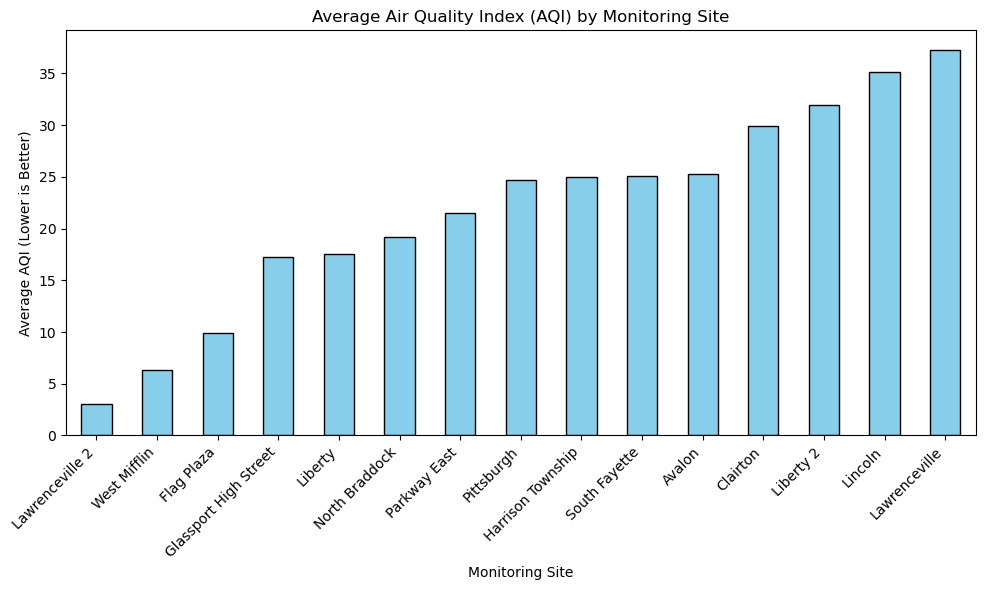

In [37]:
plt.figure(figsize=(10,6))
avg_aqi.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Air Quality Index (AQI) by Monitoring Site')
plt.ylabel('Average AQI (Lower is Better)')
plt.xlabel('Monitoring Site')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [38]:
best_site = avg_aqi.idxmin()
best_value = avg_aqi.min()

print(f"The monitoring site with the best air quality is '{best_site}' with an average AQI of {best_value}.")


The monitoring site with the best air quality is 'Lawrenceville 2' with an average AQI of 3.0.


## Conclusion

According to the Daily AQI Data, the monitoring site with the **lowest average AQI** represents the neighborhood with the cleanest air in Allegheny County.  

This area provides a healthier and more livable environment.  

This submetric can now be combined with others like **safety, green space, and transportation access** 
to determine the overall "Best Neighborhood in Pittsburgh."
